# 1. Summary: 추천시스템 데이터셋 분석하며 느낀점

- 추천시스템 학습 용으로 제공되는 데이터들의 평점은 0 이 없다.
- 때문에 실제 서비스 상황과 이질적인 데이터일 수도 있다.
- 굉장히 평점 및 view count가 극단적으로 치우쳐 있다.
- Dense한 데이터를 인위저으로 만들어 주지 않는 이상 편향적인 데이터를 활용할 수 밖에 없다.
- 단순히 평점을 예측하는 것 뿐만아니라 실상황에서 이윤이 극대화될 추천시스템을 생각해야한다.


# 2. 분석 데이터셋 종류
- 추천알고리즘 성능비교를 위한 데이터셋
  1. MovieLens
  2. KMRD
  3. Netflix

In [1]:
import os
import pandas as pd

In [2]:
pwd

'/Users/krc/Documents/RecSys'

In [3]:
data_path = 'data/'

## 1) MovieLens
  - 미네소타 대학에서 개발된 영화 평점 데이터셋으로 추천 알고리즘 성능 평가를 위해 일반적으로 많이 사용된다
  - [imdb 영화 사이트](https://www.imdb.com)를 참고하는 경우도 있다
  - [데이터셋 다운로드 링크](https://grouplens.org/datasets/movielens/)
  - `ml-latest`, `ml-25m`, `ml-1m`, `ml-10m` 등 데이터셋 크기에 따라 종류가 다양하다
  - `ml-latest-small` 을 데이터셋으로 사용한다
  - rating 값은 1~5점 사이의 값을 가진다.

In [4]:
path = data_path + "movielens/"
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [7]:
def get_simple_df_info(df):
  print("dataframe 사이즈: ", df.shape)
  print("\n")
  print("dataframe 정보")
  display(df.info())
  print("\n")
  print("dataframe 간단 통계량")
  display(df.describe())

In [8]:
get_simple_df_info(df=tags_df)

dataframe 사이즈:  (1296, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     1296 non-null   int64 
 1   movieId    1296 non-null   int64 
 2   tag        1296 non-null   object
 3   timestamp  1296 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


None



dataframe 간단 통계량


,userId,movieId,timestamp
count,1296.000000,1296.000000,1.296000e+03
mean,417.026235,42278.949846,1.324337e+09
std,142.183440,44628.345568,1.093886e+08
min,15.000000,1.000000,1.137217e+09
25%,346.000000,2988.000000,1.243455e+09
50%,431.000000,26958.500000,1.342849e+09
75%,547.000000,72268.250000,1.440380e+09
max,663.000000,164979.000000,1.476651e+09


## 2) KMRD
  - Korean Movie Recommender system Dataset
  - MovieLens 스타일로 네이버 영화 평점 사이트를 바탕으로 제작된 한국 데이터셋이다
  - [데이터셋 다운로드 링크](https://github.com/lovit/kmrd)
  - 전처리하는 데 파일별로 sep을 다르게 처리해야하는 번거러움이 있다.
  - rating 값은 1~10점 사이 값을 가진다.

In [14]:
cd 'data'

[Errno 2] No such file or directory: 'data'
/Users/krc/Documents/RecSys/data


In [16]:
path = data_path + "kmrd"
# cd 'data'

if not os.path.exists(data_path + "kmrd"):
  !git clone https://github.com/lovit/kmrd
  !python setup.py install
else:
  print("data and path already exists!")

fatal: destination path 'kmrd' already exists and is not an empty directory.
python: can't open file 'setup.py': [Errno 2] No such file or directory


- 데이터셋 종류
  - 'small', '2m', '5m'
  - delimiter = '\t'

- `2m` 또는 `5m` 은 zip파일로 되어 있으므로 아래의 코드참고
- `kmr_dataset` 있는 directory 임을 확인해야한다

In [17]:
from kmr_dataset import load_rates
from kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

skip 44048 lines which are duplicated (user, item), #uniques=2570549


In [18]:
path = "kmrd/kmr_dataset/datafile/kmrd-small"
print(os.listdir(path))

['countries.csv', 'movies.txt', 'genres.csv', 'rates.csv', 'peoples.txt', 'castings.csv']


- 데이터 종류 및 설명

| 파일 이름 | column 이름 | separator | 
|---|---|---|
| castings.csv | movie id, people id, credit order, leading(주연배우 0 or 1) | comma(,) |
| countries.csv | movie id, 국가 이름 | comma(,) |
| genres.csv | movie id, genre | comma(,) |
| movies.txt | movie id, 한국제목, 영어제목, 개봉년도, 관람등급 | tab(\t) |
| peoples.txt | people id, 한국이름, 영어이름 | tab(\t) |
| rates.csv | user id, movie id, 평점(0 ~ 10), 시간 | comma(,) |


In [19]:
castings_df = pd.read_csv(os.path.join(path, 'castings.csv'), encoding='utf-8')
get_simple_df_info(castings_df)

dataframe 사이즈:  (9776, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB


None



dataframe 간단 통계량


,movie,people,order,leading
count,9776.000000,9776.000000,9776.000000,9776.000000
mean,10499.104746,36151.930851,9.799509,0.295315
std,287.023933,62989.430164,12.576221,0.456208
min,10001.000000,5.000000,1.000000,0.000000
25%,10260.000000,4327.000000,3.000000,0.000000
50%,10485.000000,14048.500000,6.000000,0.000000
75%,10754.250000,27978.000000,10.000000,1.000000
max,10999.000000,420466.000000,101.000000,1.000000


In [20]:
countries_df = pd.read_csv(os.path.join(path, 'countries.csv'), encoding='utf-8')
get_simple_df_info(countries_df)

dataframe 사이즈:  (1109, 2)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


None



dataframe 간단 통계량


,movie
count,1109.000000
mean,10496.257890
std,285.409915
min,10001.000000
25%,10253.000000
50%,10492.000000
75%,10746.000000
max,10999.000000


In [21]:
genres_df = pd.read_csv(os.path.join(path, 'genres.csv'), encoding='utf-8')
get_simple_df_info(genres_df)

dataframe 사이즈:  (2025, 2)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB


None



dataframe 간단 통계량


,movie
count,2025.000000
mean,10474.521975
std,289.972315
min,10001.000000
25%,10221.000000
50%,10474.000000
75%,10719.000000
max,10999.000000


In [22]:
movies_df = pd.read_csv(os.path.join(path, 'movies.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(movies_df)

dataframe 사이즈:  (999, 5)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


None



dataframe 간단 통계량


,movie,year
count,999.000000,609.000000
mean,10500.000000,1987.471264
std,288.530761,15.303710
min,10001.000000,1926.000000
25%,10250.500000,1982.000000
50%,10500.000000,1989.000000
75%,10749.500000,1991.000000
max,10999.000000,2020.000000


In [23]:
peoples_df = pd.read_csv(os.path.join(path, 'peoples.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(peoples_df)

dataframe 사이즈:  (7172, 3)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   people    7172 non-null   int64 
 1   korean    7172 non-null   object
 2   original  6305 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.2+ KB


None



dataframe 간단 통계량


,people
count,7172.000000
mean,45828.791132
std,70461.756830
min,5.000000
25%,7157.000000
50%,15658.500000
75%,42337.000000
max,420466.000000


In [24]:
rates_df = pd.read_csv(os.path.join(path, 'rates.csv'), encoding='utf-8')
get_simple_df_info(rates_df)

dataframe 사이즈:  (140710, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


None



dataframe 간단 통계량


,user,movie,rate,time
count,140710.000000,140710.000000,140710.000000,1.407100e+05
mean,14948.679916,10278.818861,8.953258,1.297460e+09
std,14539.728057,292.806259,2.106047,1.374877e+08
min,0.000000,10001.000000,1.000000,1.069340e+09
25%,2980.000000,10048.000000,9.000000,1.180398e+09
50%,9292.000000,10148.000000,10.000000,1.271521e+09
75%,24129.000000,10489.000000,10.000000,1.409478e+09
max,52027.000000,10998.000000,10.000000,1.576526e+09


### genres 데이터 확인

In [32]:
genres_df.head()

,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [33]:
groups = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for index, x in groups]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [34]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [35]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션


### peoples 와 castings 데이터 확인

In [36]:
peoples_df.head()

,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino


In [37]:
castings_df.head()

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [38]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in castings_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [39]:
movies_df = pd.concat([movies_df, combined_castings_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people
movie,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]"


### countries 데이터 확인

In [40]:
countries_df.head()

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [41]:
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

,country
movie,
10001,"이탈리아,프랑스"
10002,미국
10003,미국
10004,미국
10005,미국


In [42]:
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


### ratings 데이터 확인

In [43]:
print(rates_df.shape)
print(rates_df.head())

(140710, 4)
   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340


In [44]:
n_unique_users = len(rates_df['user'].unique())
print(n_unique_users)

52028


In [45]:
n_unique_movies = len(rates_df['movie'].unique())
print(n_unique_movies)

600


In [46]:
print('평점의 평균: ', rates_df['rate'].mean())
print('평점의 표준편차: ', rates_df['rate'].std())

평점의 평균:  8.953258474877407
평점의 표준편차:  2.1060471738510547


array([[<AxesSubplot:title={'center':'user'}>,
        <AxesSubplot:title={'center':'movie'}>],
       [<AxesSubplot:title={'center':'rate'}>, <AxesSubplot:>]],
      dtype=object)

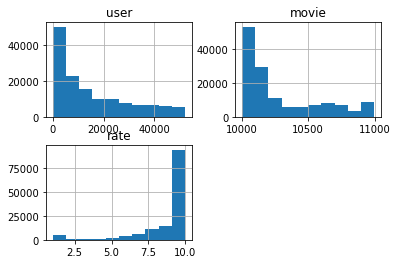

In [48]:
rates_df[['user','movie','rate']].hist()

#### user가 평점을 준 영화 수 & 평균 평점

In [52]:
stats_df = pd.DataFrame({
    'movie_count': rates_df.groupby('user')['movie'].count(),
    'rating_avg': rates_df.groupby('user')['rate'].mean(), 
'rating_std': rates_df.groupby('user')['rate'].std()})

print(stats_df.shape)
print(stats_df.head())

(52028, 3)
      movie_count  rating_avg  rating_std
user                                     
0              85    7.388235    1.337144
1               1    9.000000         NaN
2              15    7.733333    1.869556
3              92    7.413043    1.638494
4              71    6.760563    2.338893


#### rate가 많은 영화 (사람들이 평점을 준 횟수가 많은 영화)

In [53]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': rates_df.groupby('movie')['user'].count(),
    'avg_ratings': rates_df.groupby('movie')['rate'].mean(),
    'std_ratings': rates_df.groupby('movie')['rate'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(600, 4)
   movie  num_users_watch  avg_ratings  std_ratings
0  10001             3635     9.294360     2.032011
1  10002             3004     9.416778     1.740604
2  10003              989     9.270981     1.741194
3  10004              700     9.120000     1.688944
4  10005              905     9.048619     1.935881
5  10006              747     9.115127     2.004051
6  10007              699     9.034335     1.886909
7  10008              242     8.805785     2.108934
8  10009              119     8.462185     2.053480
9  10011               76     5.250000     3.128898


In [54]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movie,num_users_watch,avg_ratings,std_ratings
164,10200,7265,9.434136,1.945808
44,10048,7016,9.378706,1.853923
83,10102,4391,9.401503,2.013120
14,10016,4029,9.399851,1.863305
570,10936,3690,9.250949,1.990736
...,...,...,...,...
571,10937,1,10.000000,NaN
358,10510,1,10.000000,NaN
506,10799,1,10.000000,NaN
511,10811,1,7.000000,NaN


<AxesSubplot:>

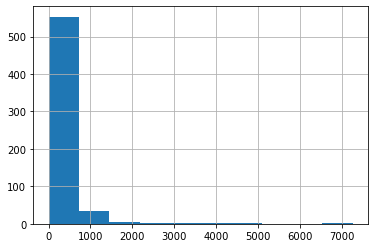

In [55]:
movieid_user_df['num_users_watch'].hist()

#### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [56]:
# 평점을 많이 받은 영화 
ratings_count_df = rates_df.groupby('movie')['user'].count()
ratings_count_df.head()

movie
10001    3635
10002    3004
10003     989
10004     700
10005     905
Name: user, dtype: int64

In [57]:
df = pd.DataFrame({
    'ratings_count': rates_df.groupby('movie')['user'].count(),
})
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [58]:
df.head()

,ratings_count,movie_name
movie,,
10001,3635,시네마 천국
10002,3004,빽 투 더 퓨쳐
10003,989,빽 투 더 퓨쳐 2
10004,700,빽 투 더 퓨쳐 3
10005,905,스타워즈 에피소드 4 - 새로운 희망


In [59]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movie,,
10200,7265,터미네이터 2:오리지널
10048,7016,죽은 시인의 사회
10102,4391,사운드 오브 뮤직
10016,4029,나 홀로 집에
10936,3690,가위손
...,...,...
10937,1,위기의 여자
10510,1,성춘향전
10799,1,내 친구 제제


#### 특정영화의 평점분포

<AxesSubplot:>

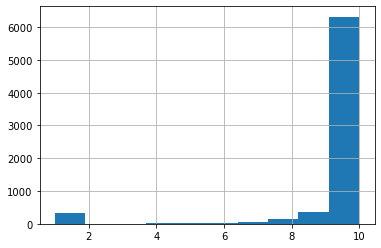

In [60]:
rates_df[rates_df.movie == 10200]['rate'].hist()

<AxesSubplot:>

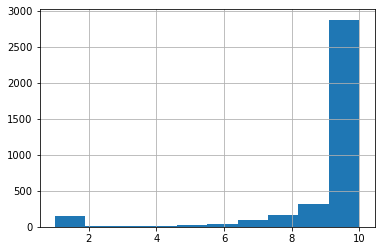

In [61]:
rates_df[rates_df.movie == 10936]['rate'].hist()

## Netflix
  - Netflix Prize 대회에서 추천알고리즘 성능 평가를 위해 사용된 데이터셋이다
  - [데이터셋 다운로드 링크](https://archive.org/details/nf_prize_dataset.tar)
  - [Kaggle 사이트](https://www.kaggle.com/netflix-inc/netflix-prize-data)
  - 데이터를 다운로드받고, README 파일 꼭 읽어보기!
  - 압축파일 용량이 700MB 가량 되어 github 따로 업로드 하지는 않겠습니다.

In [62]:
print(os.curdir)
path = data_path + 'netflix'
print(path)

.
data/netflix


### Training Dataset
- `training_set.tar`를 압축해제하면 총 17770개 파일이 있다
- 영화별로 하나의 파일이 존재하고, 첫번째 줄은 movie id를 의미한다
- 아래와 같은 형식으로 파일이 구성되어 있다
  ```
  CustomerID,Rating,Date

  - MovieIDs range from 1 to 17770 sequentially.
  - CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
  - Ratings are on a five star (integral) scale from 1 to 5.
  - Dates have the format YYYY-MM-DD.
  ```
- 다음과 같이 파일로 되어 있음을 알 수 있다   
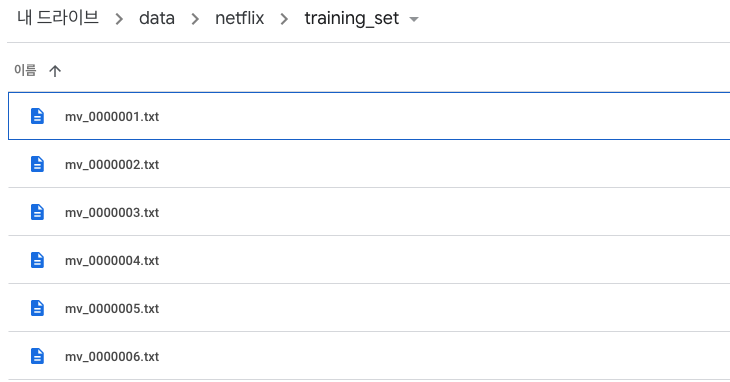

In [25]:
cd ..

/Users/krc/Documents/RecSys


In [70]:
training_set_path = os.path.join(path, 'training_set')
print(training_set_path)
training_files = os.listdir(training_set_path)

data/netflix/training_set


In [71]:
len(training_files)

17770

In [72]:
training_files[:10]

['mv_0000373.txt',
 'mv_0010160.txt',
 'mv_0009431.txt',
 'mv_0006702.txt',
 'mv_0016511.txt',
 'mv_0015018.txt',
 'mv_0002564.txt',
 'mv_0012777.txt',
 'mv_0004115.txt',
 'mv_0013469.txt']

In [73]:
def read_trainfile(filename):
  movieid = int(filename.split('.txt')[0].split('_')[1])
  data_list = []
  with open(os.path.join(training_set_path, filename), 'r') as f:
    for line in f.readlines():
      if ':' in line:
        continue
      else:
        # CustomerID,Rating,Date
        cid = line.split(',')[0]
        rate = line.split(',')[1]
        date = line.split(',')[2].replace('\n', '')
        each_data = (movieid, cid, rate, date)
        data_list.append(each_data)

  df = pd.DataFrame(data = data_list, columns =['movieid','customerID','rating','date'])
  return df

In [74]:
from tqdm import tqdm
train_df = pd.DataFrame()
for filename in tqdm(training_files[:10]):
  df = read_trainfile(filename)
  if df.shape[1] == 4:
    train_df = pd.concat([train_df, df], axis=0)

100%|██████████| 10/10 [00:00<00:00, 138.70it/s]


In [75]:
print(train_df.shape)

(44963, 4)


In [76]:
train_df.head()

,movieid,customerID,rating,date
0,373,643460,4,2005-01-26
1,373,349399,5,2002-11-06
2,373,1315469,2,2005-08-15
3,373,1022903,3,2002-11-27
4,373,302715,3,2003-07-02


In [77]:
train_df.groupby('movieid').count()

,customerID,rating,date
movieid,,,
373,85,85,85
2564,102,102,102
4115,4218,4218,4218
6702,34810,34810,34810
9431,3766,3766,3766
10160,97,97,97
12777,542,542,542
13469,1130,1130,1130
15018,126,126,126


### Movies File(Titles) 

- encoding값이 `ISO-8859-1`임을 확인한다

In [85]:
df_title = pd.read_csv(os.path.join(path, 'movie_titles.txt'), encoding = "ISO-8859-1", header = None, names = ['movieid', 'year', 'title'], sep='\t')
df_title.head()

,movieid,year,title
0,"1,2003,Dinosaur Planet",NaN,NaN
1,"2,2004,Isle of Man TT 2004 Review",NaN,NaN
2,"3,1997,Character",NaN,NaN
3,"4,1994,Paula Abdul's Get Up & Dance",NaN,NaN
4,"5,2004,The Rise and Fall of ECW",NaN,NaN


### 기타 파일
1. qualifying.txt
  - 특정 movie id에 평점을 매긴 customerid와 날짜를 적어둔 파일이다
  - qualifying 데이터셋으로 모델의 평점 예측을 기록한다
  ```
  MovieID1:
  CustomerID11,Date11
  CustomerID12,Date12
  ...
  MovieID2:
  CustomerID21,Date21
  CustomerID22,Date22
  ```

2. probe.txt
  - qualifying 데이터셋으로 최종 예측결과를 제출하기 전, 사용해볼 수 있는 테스트 파일이다
  ```
  MovieID1:
  CustomerID11
  CustomerID12
  ...
  MovieID2:
  CustomerID21
  CustomerID22
  ```